In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks, regularizers
from sklearn.pipeline import Pipeline

In [3]:
df_train=pd.read_csv('all_csv/train.csv')
df_test=pd.read_csv('all_csv/test.csv')
df_sub=pd.read_csv('all_csv/sample_submission.csv')
orig_df=('all_csv/credit_risk_dataset.csv')

In [4]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [6]:
print('Train size:', df_train.shape)
print('Test size', df_test.shape)

Train size: (58645, 13)
Test size (39098, 12)


In [7]:
df_train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df_test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
df_train['loan_int_rate'] = df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean())
df_train['person_emp_length'] = df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean())

In [10]:
df_train.duplicated().sum()
#df_train.drop_duplicates(inplace=True)

0

In [11]:
df_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


pre-processing data


In [12]:
numerical_cols=df_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_train.select_dtypes(include=[object]).columns.tolist()
numerical_cols.remove('loan_status')

In [13]:
numerical_cols

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [14]:
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [15]:
label_encoder=LabelEncoder()
for col in categorical_cols:
    df_train[col]=label_encoder.fit_transform(df_train[col])

y=df_train['loan_status']
if not np.array_equal(np.unique(y),[0,1]):
    label_encoder=LabelEncoder()
    y=label_encoder.fit_transform(y)

X=df_train.drop('loan_status',axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=44)

In [16]:
df_train.corr()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,1.000000,0.008608,-0.001896,-0.002662,0.005376,-0.005382,-0.002184,-0.000403,-0.003454,-0.002677,-0.001681,0.008139,-0.008138
person_age,0.008608,1.000000,0.102176,-0.051070,0.121276,0.063917,0.016497,0.050378,0.009653,-0.031975,0.004408,0.874260,-0.001130
person_income,-0.001896,0.102176,1.000000,-0.282072,0.164042,0.000491,-0.059279,0.310942,-0.057611,-0.280314,-0.035514,0.082727,-0.169956
person_home_ownership,-0.002662,-0.051070,-0.282072,1.000000,-0.292121,-0.004991,0.186281,-0.114323,0.206296,0.160286,0.100410,-0.045610,0.220167
person_emp_length,0.005376,0.121276,0.164042,-0.292121,1.000000,0.024789,-0.091514,0.092046,-0.101910,-0.065824,-0.054467,0.102842,-0.100428
loan_intent,-0.005382,0.063917,0.000491,-0.004991,0.024789,1.000000,-0.004446,0.001284,-0.005805,0.005768,-0.006740,0.058350,-0.048751
loan_grade,-0.002184,0.016497,-0.059279,0.186281,-0.091514,-0.004446,1.000000,0.113273,0.935837,0.153865,0.550677,0.012276,0.385908
loan_amnt,-0.000403,0.050378,0.310942,-0.114323,0.092046,0.001284,0.113273,1.000000,0.113582,0.647266,0.020271,0.045720,0.144982
loan_int_rate,-0.003454,0.009653,-0.057611,0.206296,-0.101910,-0.005805,0.935837,0.113582,1.000000,0.152201,0.501841,0.007535,0.338948
loan_percent_income,-0.002677,-0.031975,-0.280314,0.160286,-0.065824,0.005768,0.153865,0.647266,0.152201,1.000000,0.042979,-0.023202,0.378280


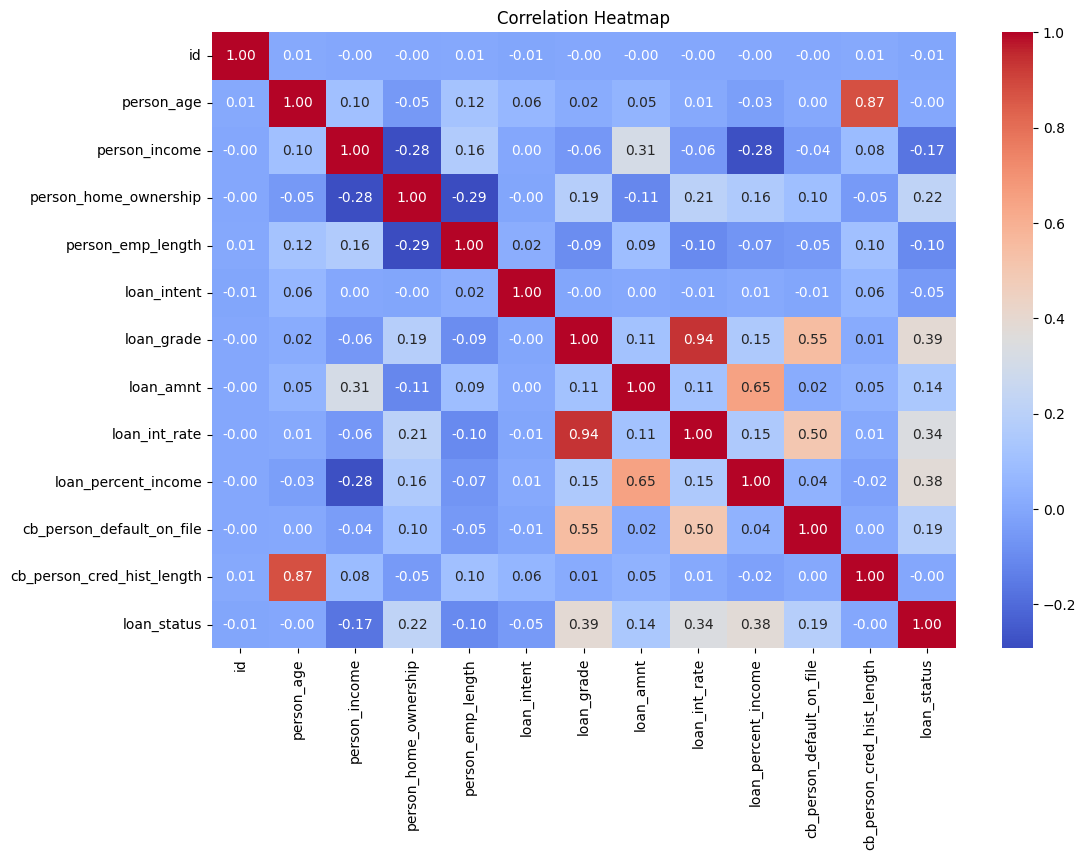

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
xgb_model=xgb.XGBClassifier(eval_metric='logloss',random_status=23)
xgb_model.fit(X_train,y_train)

C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:09:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "random_status" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred_xgb=xgb_model.predict(X_val)
y_pred_proba_xgb=xgb_model.predict_proba(X_val)[:,1]

In [20]:
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost AUC-ROC:", roc_auc_score(y_val, y_pred_proba_xgb))

XGBoost Accuracy: 0.9515730241282292
XGBoost AUC-ROC: 0.9498341941834916


CATBOOST

In [21]:
cat_model=cb.CatBoostClassifier(iterations=500,learning_rate=0.05,depth=10,random_state=45,verbose=0)
cat_model.fit(X_train,y_train)
y_pred_cat = cat_model.predict(X_val)
y_pred_proba_cat = cat_model.predict_proba(X_val)[:, 1]
print("CatBoost Accuracy:", accuracy_score(y_val, y_pred_cat))
print("CatBoost AUC-ROC:", roc_auc_score(y_val, y_pred_proba_cat))

CatBoost Accuracy: 0.952766646772956
CatBoost AUC-ROC: 0.9481230008259071


Neural

In [22]:
nn_model=models.Sequential([
    layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dense(1,activation='sigmoid')    
])

nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=nn_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_val, y_val), verbose=1)

C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7929 - loss: 528.5342 - val_accuracy: 0.8730 - val_loss: 15.4820
Epoch 2/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8088 - loss: 25.4260 - val_accuracy: 0.7610 - val_loss: 2.5386
Epoch 3/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8064 - loss: 5.0711 - val_accuracy: 0.8710 - val_loss: 0.6398
Epoch 4/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7844 - loss: 2.2245 - val_accuracy: 0.8618 - val_loss: 2.2145
Epoch 5/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7765 - loss: 1.4373 - val_accuracy: 0.8571 - val_loss: 0.4203
Epoch 6/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7673 - loss: 0.8472 - val_accuracy: 0.7731 - val_loss: 0.5495
Epoch 7/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8446 - loss: 0.5789 - val_accuracy: 0.8644 - val_loss: 0.4206
Epoch 8/200
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8526 - loss: 0.5138 - val_

In [23]:
y_pred_nn = nn_model.predict(X_val).flatten()
y_pred_proba_nn = y_pred_nn

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [24]:
print("Neural Network Accuracy:", accuracy_score(y_val, (y_pred_proba_nn > 0.6).astype(int)))
print("Neural Network AUC-ROC:", roc_auc_score(y_val, y_pred_proba_nn))

Neural Network Accuracy: 0.8853269673458948
Neural Network AUC-ROC: 0.6680767005603151


In [62]:
from tensorflow.keras.models import Model
from tensorflow.keras import Model

Transformer

In [65]:
def transformer_model(input_shape):
    inputs=layers.Input(shape=input_shape)

    x=layers.Dense(64)(inputs)
    x=layers.Reshape((-1,64))(x)

    attention_output=layers.MultiHeadAttention(num_heads=4,key_dim=64)(x,x)
    x=layers.Add()([x,attention_output])   #residual layer
    x=tf.keras.layers.LayerNormalization ()(x)

    ff_output=layers.Dense(128,activation='relu')(x)
    ff_output=layers.Dense(64)(ff_output)
    x=layers.Add()([x,ff_output])
    x=tf.keras.layers.LayerNormalization ()(x)

    x=layers.GlobalAveragePooling1D()(x)

    outputs=layers.Dense(1,activation='sigmoid')(x)

    model=Model(inputs=inputs,outputs=outputs)

    return model
    
        
    
    

In [66]:
# # Define the model
input_shape = (X_train.shape[1],)  # The input shape is (number of features,)
model_transformer = transformer_model(input_shape)

model_transformer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=model_transformer.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_val,y_val),verbose=1)

# Predict on validation data
y_pred_proba=model_transformer.predict(X_val).flatten()




Epoch 1/100


C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1466/1467 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8739 - loss: 0.3521

C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1467/1467 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8739 - loss: 0.3521 - val_accuracy: 0.8806 - val_loss: 0.3328
Epoch 2/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8844 - loss: 0.3337 - val_accuracy: 0.8857 - val_loss: 0.3274
Epoch 3/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8854 - loss: 0.3301 - val_accuracy: 0.8858 - val_loss: 0.3284
Epoch 4/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8837 - loss: 0.3341 - val_accuracy: 0.8826 - val_loss: 0.3312
Epoch 5/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8850 - loss: 0.3337 - val_accuracy: 0.8873 - val_loss: 0.3261
Epoch 6/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8856 - loss: 0.3317 - val_accuracy: 0.8892 - val_loss: 0.3247
Epoch 7/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8850 - loss: 0.3335 - val_accuracy: 0.8889 - val_loss: 0.3252
Epoch 8/100
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8851 - loss: 0.333

C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


355/367 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

C:\Users\jv028u\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [68]:
y_pred_proba_transformer = model_transformer.predict(X_val).flatten()
print("Transformer Accuracy:", accuracy_score(y_val, (y_pred_proba_transformer > 0.5).astype(int)))
print("Transformer AUC-ROC:", roc_auc_score(y_val, y_pred_proba_transformer))

367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Transformer Accuracy: 0.8960695711484356
Transformer AUC-ROC: 0.8800138908001549


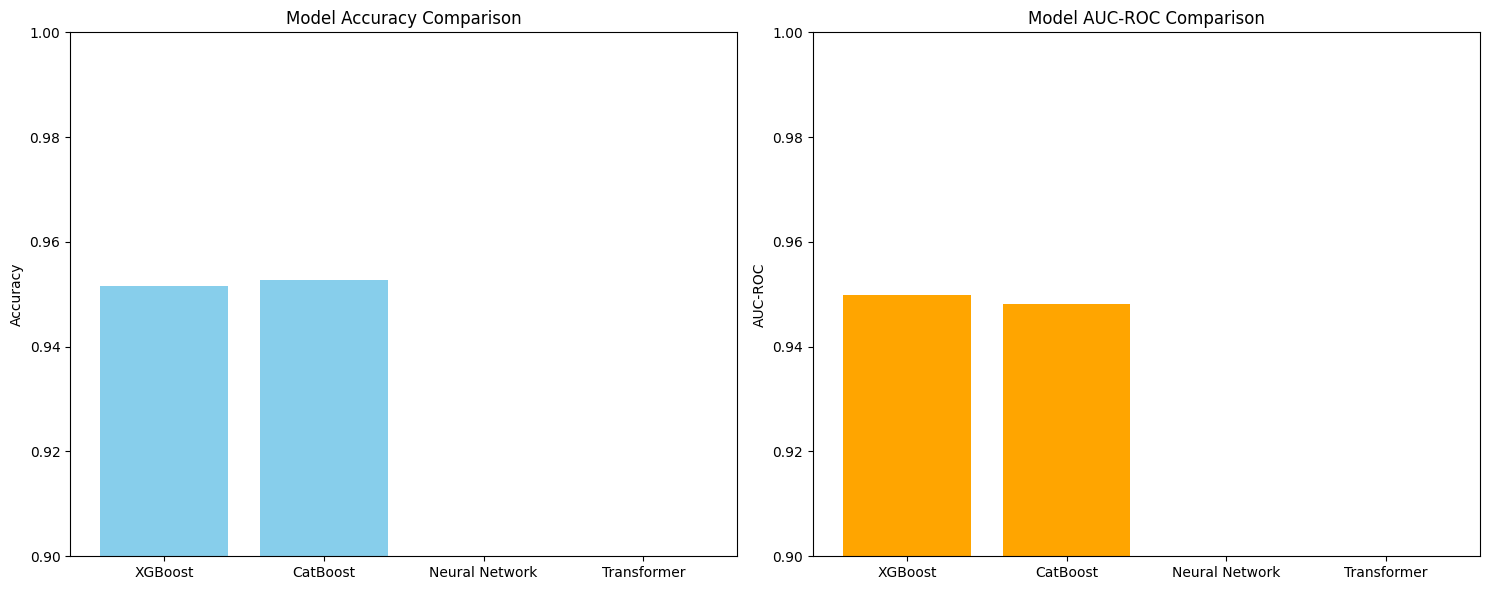

,Model,Accuracy,AUC-ROC,Training Time (approx.)
0,XGBoost,0.951573,0.949834,10
1,CatBoost,0.952767,0.948123,15
2,Neural Network,0.885753,0.668077,180
3,Transformer,0.896070,0.880014,200


In [72]:
comaprison_data={
    "Model":["XGBoost","CatBoost","Neural Network","Transformer"],
    "Acuuracy":[
    xgb_model.score(X_val,y_val),
    cat_model.score(X_val, y_val),
    accuracy_score(y_val,(y_pred_proba_nn>0.5).astype(int)),
    accuracy_score(y_val,(y_pred_proba_nn>0.5).astype(int)),
    ],

    "AUC_ROC":[
        roc_auc_score(y_val, xgb_model.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, cat_model.predict_proba(X_val)[:, 1]),
        roc_auc_score(y_val, y_pred_proba_nn),
        roc_auc_score(y_val, y_pred_proba_transformer)
        ],
    "Training Time (approx.)": [10, 15, 180, 200]
}

comparison_df = pd.DataFrame(comparison_data)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].bar(comparison_df["Model"], comparison_df["Accuracy"], color="skyblue")
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0.9, 1)

axes[1].bar(comparison_df["Model"], comparison_df["AUC-ROC"], color="orange")
axes[1].set_title("Model AUC-ROC Comparison")
axes[1].set_ylabel("AUC-ROC")
axes[1].set_ylim(0.9, 1)

plt.tight_layout()
plt.show()

comparison_df

In [83]:
type(y_pred_proba_nn)

numpy.ndarray

In [76]:
cv

0.8857532611475829

In [78]:
y_pred_proba_nn>0.5

array([False, False, False, ..., False, False, False])

In [86]:
from sklearn.metrics import accuracy_score
# True labels (y_val) and predicted probabilities (y_pred_prob)
y_val = [1, 0, 1, 0, 1]
y_pred_prob = [0.9, 0.2, 0.8, 0.4, 0.95]
y_pred_prob=np.array(y_pred_prob)
# Convert probabilities to binary class predictions using threshold 0.5

y_pred_class = (y_pred_prob > 0.5).astype(int)
print(y_pred_class)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_class)
print("Accuracy:", accuracy)

[0.9  0.2  0.8  0.4  0.95]
[1 0 1 0 1]
Accuracy: 1.0
